In [2]:
import numpy as np
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import fitness_mcmc
import fitness_mcmc.data_io as io
import fitness_mcmc.fitness_mcmc as m

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


[[ 13439   2064      0      0      0      0]
 [ 12698   1987      0      0      0      0]
 [ 16799   2535      0      0      0      0]
 [ 12833   1963      0      0      0      0]
 [ 17980   2752      0      0      0      0]
 [ 16960   2473      0      0      0      0]
 [ 16440   2386      0      0      0      0]
 [ 13905   2077      0      0      0      0]
 [ 15732   2448      0      0      0      0]
 [ 16299   2264      0      0      0      0]
 [ 15367   2364      0      0      0      0]
 [ 17082   2438      0      0      0      0]
 [ 14917   2309      0      0      0      0]
 [ 14290   2139      0      0      0      0]
 [ 15905   2351      0      0      0      0]
 [ 17227   2373      0      0      0      0]
 [ 13856   2197      0      0      0      0]
 [ 13012   2140      0      0      0      0]
 [ 15562   2413      0      0      0      0]
 [  3987      0      0      0      0      0]
 [  3558   1157      0      0      0      0]
 [  3581   1722      0   1390      0      0]
 [  3370  

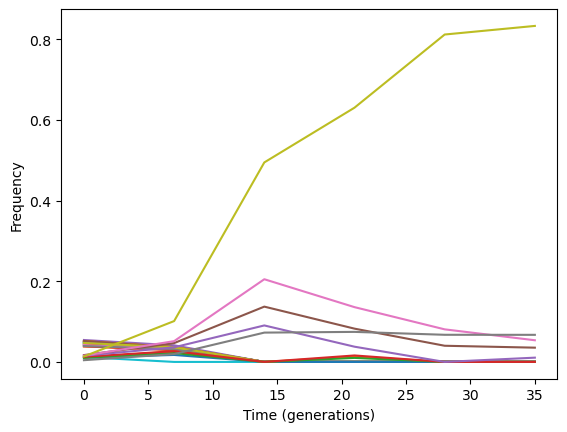

In [3]:
data, time, ordered_counts = io.load_data("LTEE_gluL1.csv", return_ordered = False, delimiter=",")
print(ordered_counts.astype("int"))
print(data)

ordered_frequencies = ordered_counts / np.sum(ordered_counts, axis = 0)

plt.plot([0,7,14,21,28,35], ordered_frequencies.T)
plt.xlabel('Time (generations)')
plt.ylabel('Frequency')
plt.show()

In [4]:
fitness_model = m.Fitness_Model(ordered_counts, time, s_ref = 0, prior="flat")
fitness_model.find_MAP()

C:\Users\jedwa\anaconda3\envs\Fitness_code\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in true_divide
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


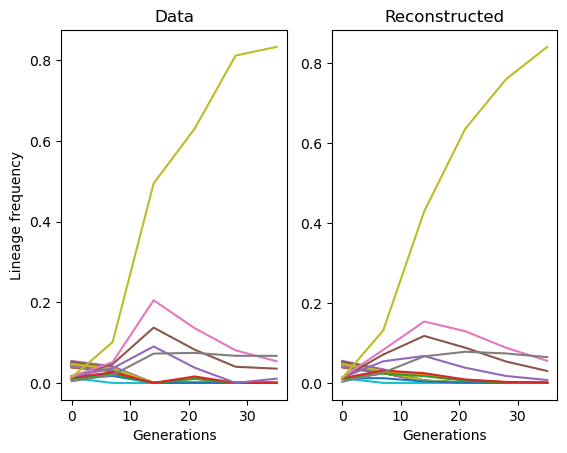

[[ 2.09074385e-03]
 [-1.96290829e-03]
 [-4.31948121e-04]
 [-3.73312111e-04]
 [-5.82892780e-03]
 [-6.36243468e-03]
 [-3.12497168e-03]
 [ 1.46691169e-03]
 [-1.13701258e-02]
 [ 1.88681829e-04]
 [-8.26085538e-03]
 [ 8.76731980e-04]
 [-2.88780942e-03]
 [-4.29466316e-03]
 [-1.23179289e-02]
 [ 3.54937890e-03]
 [ 7.58072991e-03]
 [ 1.07234563e-03]
 [-1.12941779e+00]
 [ 7.47806088e-02]
 [ 2.04069291e-01]
 [ 1.94132528e-01]
 [ 2.05609667e-01]
 [ 2.72101507e-01]
 [ 3.12877998e-01]
 [ 3.29316005e-01]
 [ 3.76556725e-01]
 [ 4.10052994e-01]]


<Figure size 640x480 with 0 Axes>

In [5]:
fitness_model.plot_MAP_estimate(type = "lin", filename="LTEE_gluL1_freq.png")
vals_s = fitness_model.map_estimate["s"]
vals_f0 = fitness_model.map_estimate["f0"]
print(vals_s)

